<center>
<h1>EJERICIO 1.</h1>
</center>

Utilizando el metodo de proyeccion de Galerkin encuentre los coeficientes que permiten aproximar la función en cada caso. Se sabe que una función aproximada se escrie de la siguiente manera 

$$ f(x) \approx \sum_{i=0}^{n} \alpha_i u_i(x) $$

Se tiene como problema encontrar los coeficientes $\alpha_i$ con los cuales se obtenga un error muy bajo entre la función real y la función aproximada.

Para darle solución a este problema, se define una siguiente función en la que se hace la aproximación nuemérica, en esta se incluye una matriz $A$ que contiene las funciones base que sirven para aproximar la función original; esta también contiene un vector $x$ en donde están los coeficientes $\alpha_i$, y por útltimo se tiene el vector $b$ del producto de la función a aproximar con la funcón base. Es decir, se tiene el siguiente sistema: 


$$A = [a_{ij}] = \mathbf{u}_i(x)\cdot \mathbf{u}_j(x) = \int \limits _\Omega u_i(x) u_j(x) dx $$

$$b = [b_i] = f(x) \cdot \mathbf{u}_i(x)  = \int \limits _\Omega f(x) u_i(x)dx$$

$$x = \alpha_i $$

De lo anterior, el problema toma la siguiente solución:  $$ x = A^{-1}b $$



In [1]:
# Importacion de librerias
import numpy as np
import sympy as sym 
from numpy.linalg import det, inv
from scipy.integrate import quad
from sympy.plotting import plot

In [2]:
def aproximacion_num(f, ui, lim):
    n = len(ui)                                         # Numero de iteraciones (cantidad de funciones base) 
    x = sym.Symbol('x')                                 # Simbolo de la variable independiente 
    A = sym.zeros(n,n)                                  # Matriz de la longitud de la cantidad de polinomios
    b = sym.zeros(n,1)                                  # Vector de la funcion por el polinomio

    for i in range(n):
        for j in range(i, n): 

            funcion = sym.lambdify(x, ui[i]*ui[j])      # Se toma valores numerico ára "x" y con ellos se evalua ui[i]*ui[j]

            A[i,j] = quad(funcion, lim[0], lim[1])[0]   # Integra la funcion de lambda en los limites establecidos y lo asocia a las posiciones i j de la matriz
            A[j,i] = A[i,j]

        funcion = sym.lambdify(x, ui[i]*f)

        b[i,0] = quad(funcion, lim[0], lim[1])[0]       # Integra la funcion de lambda en los limites establecidos y toma solo el valor asociado a i

    alp = A.LUsolve(b)                                  # Se resuelve el sistema para encontrar los coeficientes

    fg= 0                                               # Se inicia la función aproximada en cero 

    for i in range(n):
        fg += alp[i,0]*ui[i]                            # Se va agregando en cada iteracion

    funcion = sym.lambdify(x, (f-fg)*(f-fg))
    e  = np.sqrt(quad(funcion, lim[0], lim[1])[0])      # Magnitud del error

    print(f"El error entre la funcion real y la aproximada es de {e}")

    return A, b, fg, alp

    

a. Aproximar $tan(x)$ sobre el conjunto {1, $e^{−x}$, $e^{−2x}$, $e^{x}$, $e^{2x}$}, en el intervalo [0, π/4]

El error entre la funcion real y la aproximada es de 0.00011111664875482143
La funcion aproximada es 0.296475608312038*exp(2*x) - 0.731803087250492*exp(x) + 2.00072056418756 - 2.0036617319948*exp(-x) + 0.438611370407534*exp(-2*x)


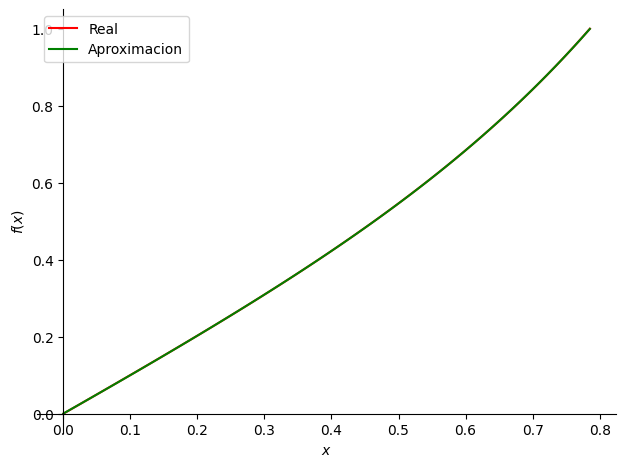

In [3]:
x = sym.Symbol('x')                                                     # Variable independiente de forma simbolica
f = sym.tan(x)                                                          # Funcion a aproximar
ui = [1, sym.exp(-x), sym.exp(-2*x), sym.exp(x), sym.exp(2*x)]          # Funciones base de aproximacion
lim = [0, (np.pi)/4]                                                    # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

m = fg #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES

grafico = plot(f,m, (x, lim[0], lim[1]), show=False, legend= True)      # Grafico en los limites dados
#grafico = plot(f,m, (x, -1, lim[1]), show=False)                       #  Permite ver las funciones en un rango mas amplio 
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()


b. Aproximar $f(x) = \frac{d^2}{dx^2}(e^{-x^2})$, sobre el conjunto {$sin(iπx)$, $cos(iπx)$}$, con i ∈ {1, 2, 3}, en el intervalo [−5, 5]

El error entre la funcion real y la aproximada es de 1.8220231109328389
La funcion aproximada es -0.296705771889363*cos(3.14159265358979*x) - 0.00072385230661013*cos(6.28318530717959*x) - 7.11477485870297e-9*cos(9.42477796076938*x)


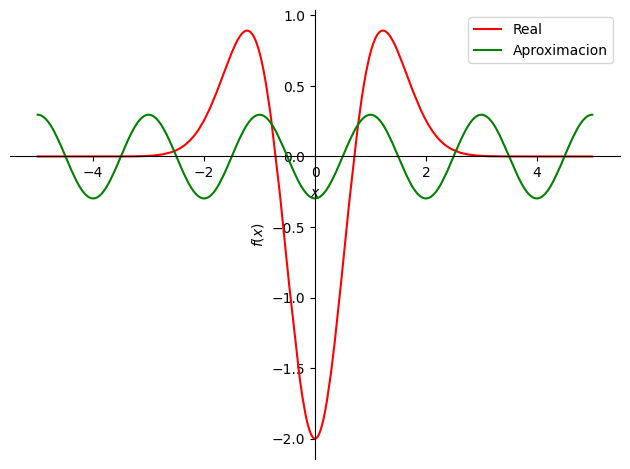

In [26]:
x = sym.Symbol('x')                                                     # Variable independiente de forma simbolica
f = sym.exp(-x**2)                                                   
derivada_2 = f.diff(x,x)                                                # Funcion a aproximar
ui = [sym.sin(np.pi*x), sym.cos(np.pi*x),                               # Funciones base de aproximacion
      sym.sin(2*np.pi*x),sym.cos(2*np.pi*x),
      sym.sin(3*np.pi*x), sym.cos(3*np.pi*x)] 
lim = [-5,5]                                                            # Rango en el que se hace la integracion

#ui = []
#for i in range(1, 4):
    #ui.append([sym.sin(i*np.pi*x), sym.cos(i*np.pi*x)])             

m = fg                                                                  #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES
grafico = plot(derivada_2,fg, (x, lim[0], lim[1]), show=False, legend= True)     
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()



c. f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$, sobre el conjunto {$1, x, x^{2}, x^{3}, x^{4}, x^{5}$}, en el intervalo [−2, 4]

El error entre la funcion real y la aproximada es de 0.35395011099056606
La funcion aproximada es -0.0118957196778012*x**5 + 0.0535719952843212*x**4 + 0.0630927148339173*x**3 - 0.412976319014695*x**2 - 0.0350468286446076*x + 0.844037636831369


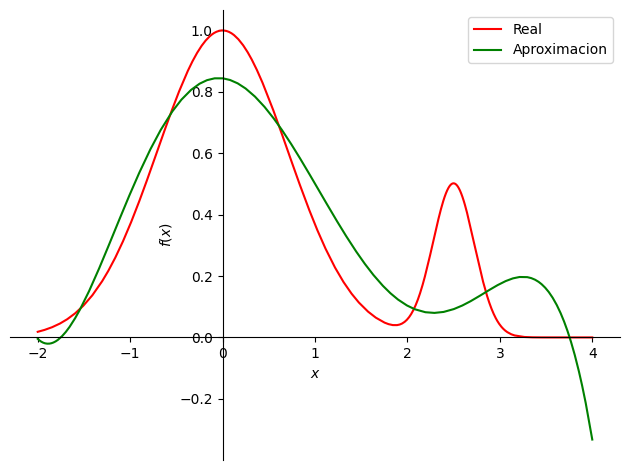

In [52]:
x = sym.Symbol('x')                                            # Variable independiente de forma simbolica
f = sym.exp(-x**2) + 0.5 * sym.exp(-10*(x-2.5)**2)             # Funcion a aproximar
ui = [1, x, x**2, x**3, x**4, x**5]                            # Funciones base de aproximacion
lim = [-2, 4]                                                  # Rango en el que se hace la integracion

A, b, f_aprox, alp = aproximacion_num(f, ui, lim)

m = f_aprox                                                     #Funcion aproximada 
print(f"La funcion aproximada es {m}")

# GRAFICO DE LAS FUNCIONES
grafico = plot(f,m, (x, lim[0], lim[1]), show=False, legend= True)              
grafico[0].line_color= 'r'
grafico[0].label = "Real"
grafico[1].line_color= 'g'
grafico[1].label = "Aproximacion"
grafico.show()